<a href="https://colab.research.google.com/github/o0windseed0o/Social_network_analysis/blob/master/network_exposure_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compute network exposure variables using python codes**

--Author: Yang Xiang <br>
--Location: UTHealth, U.S. <br>
--Date: 03/07/2020

# Introduction

The determination of characteristics of a certain node in a network is sometimes associated with both the node itself and the neighborhood it belongs to. For example, when determining the risk of infection by a disease for node i, the characteristics of its network neighbors are also considered:
\begin{equation*}
Risk_i = Risk (Attr_i + \frac{1}{R}\sum_{j\in Nbr(i)}Att_j)
\end{equation*}
where the first part of the risk comes from the attributes of the node, and the second part is a weighted summarization from its neighbors (denoted by Nbr(i), and $R$ is the number of its neighbors, behaving as the regularizer), which we call it "network exposure".

This notebook provides a simplist python function for computing the network exposure, and demonstrates how to use the function by simulating a sexual network for HIV transimission, defining some variables, assigning random values to them, and computing exposures of certain variables. 

# Environment



Python 3.x <br>
Numpy <br>

# Code

## define the network

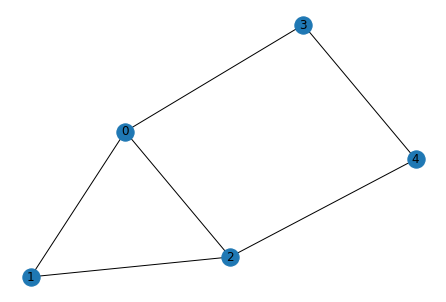

In [25]:
import numpy as np
import networkx as nx

NUM_NODES = 5
# define a network structure by simulating 5 nodes as well as some edges through
# adjacency matrix, note that node 3 in the diagonal is 1, which should be removed
# through further processings
adj_matrix = [[0,1,1,1,0],
              [1,0,1,0,0],
              [1,1,0,0,1],
              [1,0,0,1,1],
              [0,0,1,1,0]]
adj_matrix = np.asarray(adj_matrix)
G = nx.from_numpy_matrix(adj_matrix) 
nx.draw(G, with_labels=True)

## Define the attributes for each node.

In [20]:
# define a story (infectious disease) as HIV transmission among node 0-5 using 
# some node variables
node_attr = ['hiv_status', 'syphilis_status', 'viral_load']

np.random.seed(1234)
hiv_status_array = np.random.randint(2, size=NUM_NODES)
np.random.seed(2345)
syphilis_status_array = np.random.randint(2, size=NUM_NODES)
np.random.seed(3456)
vl_array = np.random.randint(2000, size=NUM_NODES)

# we compute the log of viral load as the attribute instead, and we randomly
# set some values to zero and add a normalized function
rand_positions = np.random.randint(NUM_NODES, size=2)
vl_array[rand_positions] = 0

print("# HIV status for each node")
print(hiv_status_array)

print("# Syphilis status for each node")
print(syphilis_status_array)

print("# Viral load for each node after random bzeros")
print(vl_array)

# combine the three attributes to one
attr_array = np.concatenate((hiv_status_array, syphilis_status_array, vl_array),
                            axis=0)
attr_array = np.reshape(attr_array, (len(node_attr), hiv_status_array.shape[0]))
attr_array = attr_array.astype(float)
print("# The overall attribute list")
print(attr_array)

# the index of each attributes
attr2index = {node_attr[i]:i for i in range(len(node_attr))}
print("# The index of each attribute")
print(attr2index)

# HIV status for each node
[1 1 0 1 0]
# Syphilis status for each node
[0 1 0 0 0]
# Viral load for each node after random bzeros
[667 226 450   0   0]
# The overall attribute list
[[  1.   1.   0.   1.   0.]
 [  0.   1.   0.   0.   0.]
 [667. 226. 450.   0.   0.]]
# The index of each attribute
{'hiv_status': 0, 'syphilis_status': 1, 'viral_load': 2}


## Define the function for exposure computation

In [0]:
def compute_exposure(attr_name, attr_array, attr2index, adj_matrix):
  # get the certain attribute for the whole graph
  attributes = attr_array[:, attr2index[attr_name]]
  print("# The values for attribute {} are {}".format(attr_name, attributes))
  # zero the diagnal vector
  np.fill_diagonal(adj_matrix, 0)
  # after bzero the diagonal of the adj matrix
  print("\n# The adj matrix after zeroing the diagnal vector\n")
  print(adj_matrix)
  # number of neighbors for each node
  row_sum = np.sum(adj_matrix, axis=1)
  return np.dot(adj_matrix, attributes) / np.where(row_sum > 0, row_sum, 1e-13)

## Define the function to normalize attributes for each node.

In [0]:
def normalize_attributes(attributes, header):
  eposilon = 1e-12
  for index, att in enumerate(attributes):
    attr_name = header[index]
    if len(str(att)) == 0:
      attributes[index] = eposilon
    if 'viral_load' == attr_name:
      if attributes[index] < eposilon:
        attributes[index] = 0.0
      else:
        attributes[index] = np.log(attributes[index])
  return attributes

## The demo computation

In [23]:
# normalize attributes for each node
attr_array = np.transpose(attr_array)
print(attr_array)
attr_array = [normalize_attributes(attributes, node_attr) for attributes in attr_array]
# attr_array = np.transpose(node2attrs)
attr_array = np.asarray(attr_array)
print(attr_array)

[[  1.   0. 667.]
 [  1.   1. 226.]
 [  0.   0. 450.]
 [  1.   0.   0.]
 [  0.   0.   0.]]
[[1.         0.         6.50279005]
 [1.         1.         5.420535  ]
 [0.         0.         6.10924758]
 [1.         0.         0.        ]
 [0.         0.         0.        ]]


In [32]:
# compute exposure variables
attr_name = 'hiv_status'
exposure = compute_exposure(attr_name, attr_array, attr2index, adj_matrix)
print("\n# The network exposure for {} is {}\n".format(attr_name, exposure))

attr_name = 'syphilis_status'
exposure = compute_exposure(attr_name, attr_array, attr2index, adj_matrix)
print("\n# The network exposure for {} is {}\n".format(attr_name, exposure))

attr_name = 'viral_load'
exposure = compute_exposure(attr_name, attr_array, attr2index, adj_matrix)
print("\n# The network exposure for {} is {}\n".format(attr_name, exposure))

# The values for attribute hiv_status are [1. 1. 0. 1. 0.]

# The adj matrix after zeroing the diagnal vector

[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]

# The network exposure for hiv_status is [0.66666667 0.5        0.66666667 0.5        0.5       ]

# The values for attribute syphilis_status are [0. 1. 0. 0. 0.]

# The adj matrix after zeroing the diagnal vector

[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]

# The network exposure for syphilis_status is [0.33333333 0.         0.33333333 0.         0.        ]

# The values for attribute viral_load are [6.50279005 5.420535   6.10924758 0.         0.        ]

# The adj matrix after zeroing the diagnal vector

[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]

# The network exposure for viral_load is [3.84326086 6.30601881 3.97444168 3.25139502 3.05462379]



Thus, for example, when determining the viral load of node 0, not only 6.50279005 but also 3.84326086 should be considered.